In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kagglex/sample_submission.csv
/kaggle/input/kagglex/train.csv
/kaggle/input/kagglex/test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import re

In [3]:
train_df = pd.read_csv('/kaggle/input/kagglex/train.csv')
test_df = pd.read_csv('/kaggle/input/kagglex/test.csv')

In [4]:
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [6]:
train_df.shape

(54273, 13)

In [7]:
train_df.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


In [8]:
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


# **ANALYSIS AND EXPLORATION**

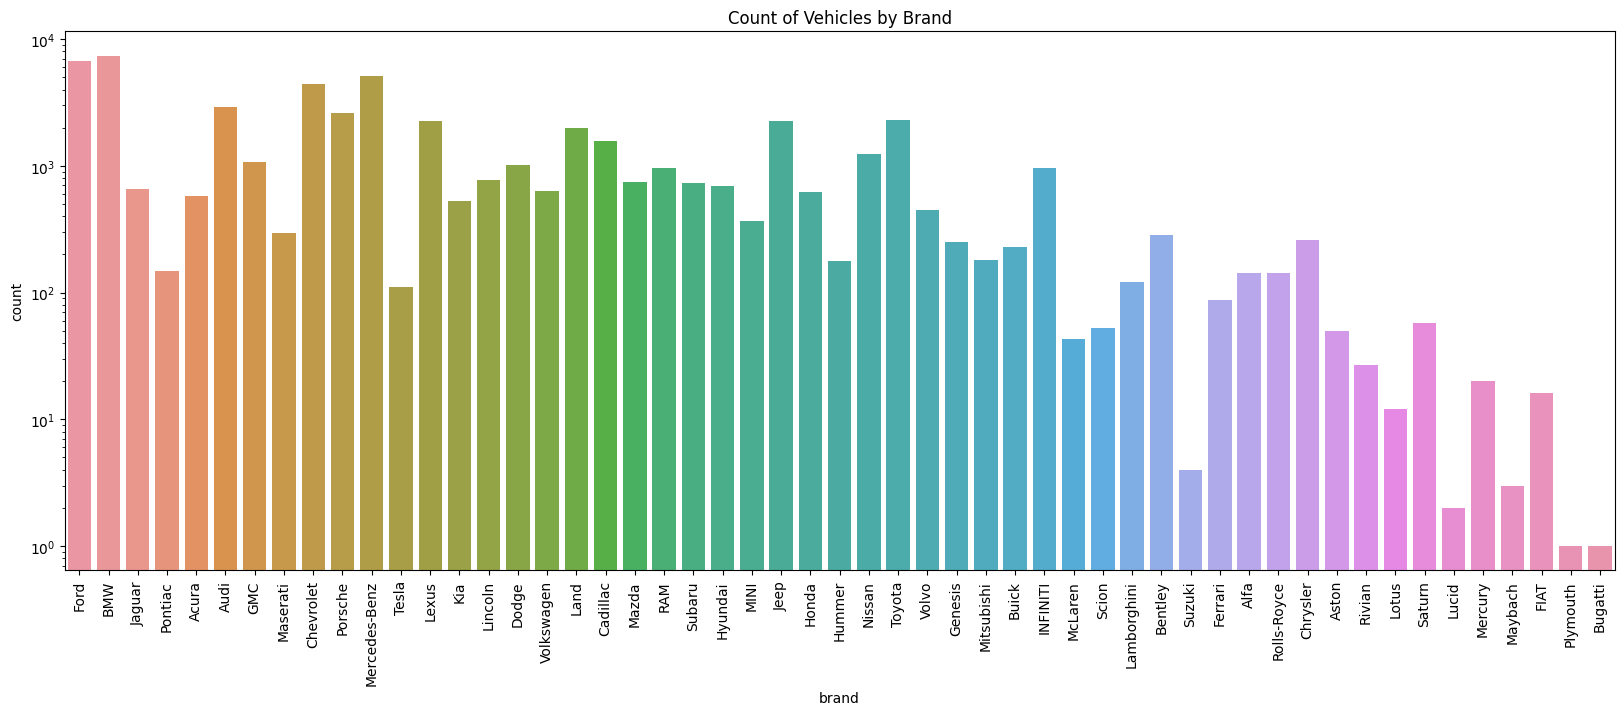

In [9]:
plt.figure(figsize=(20, 7))
sns.countplot(x='brand', data=train_df)
plt.title('Count of Vehicles by Brand')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

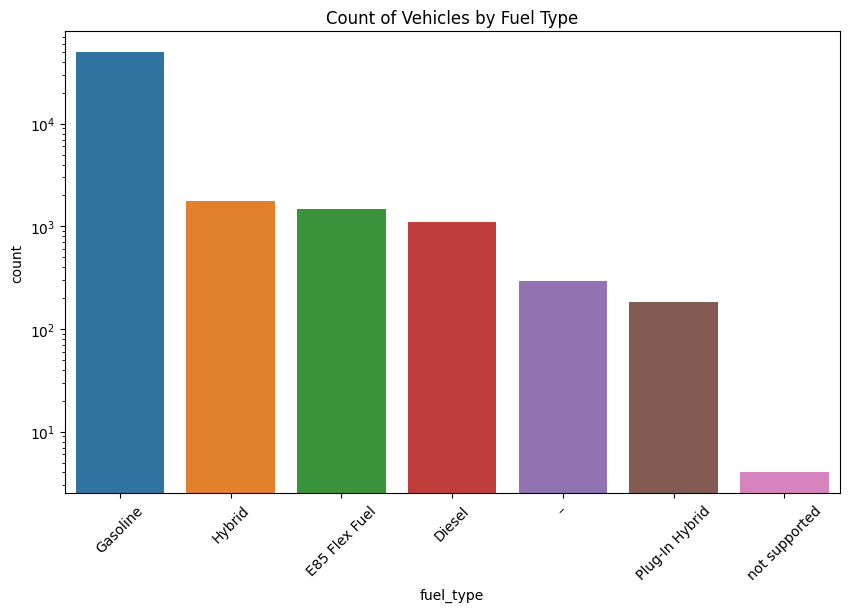

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='fuel_type',data=train_df)
plt.xticks(rotation=45, fontsize=10)
plt.yscale('log')
plt.title("Count of Vehicles by Fuel Type")
plt.show()

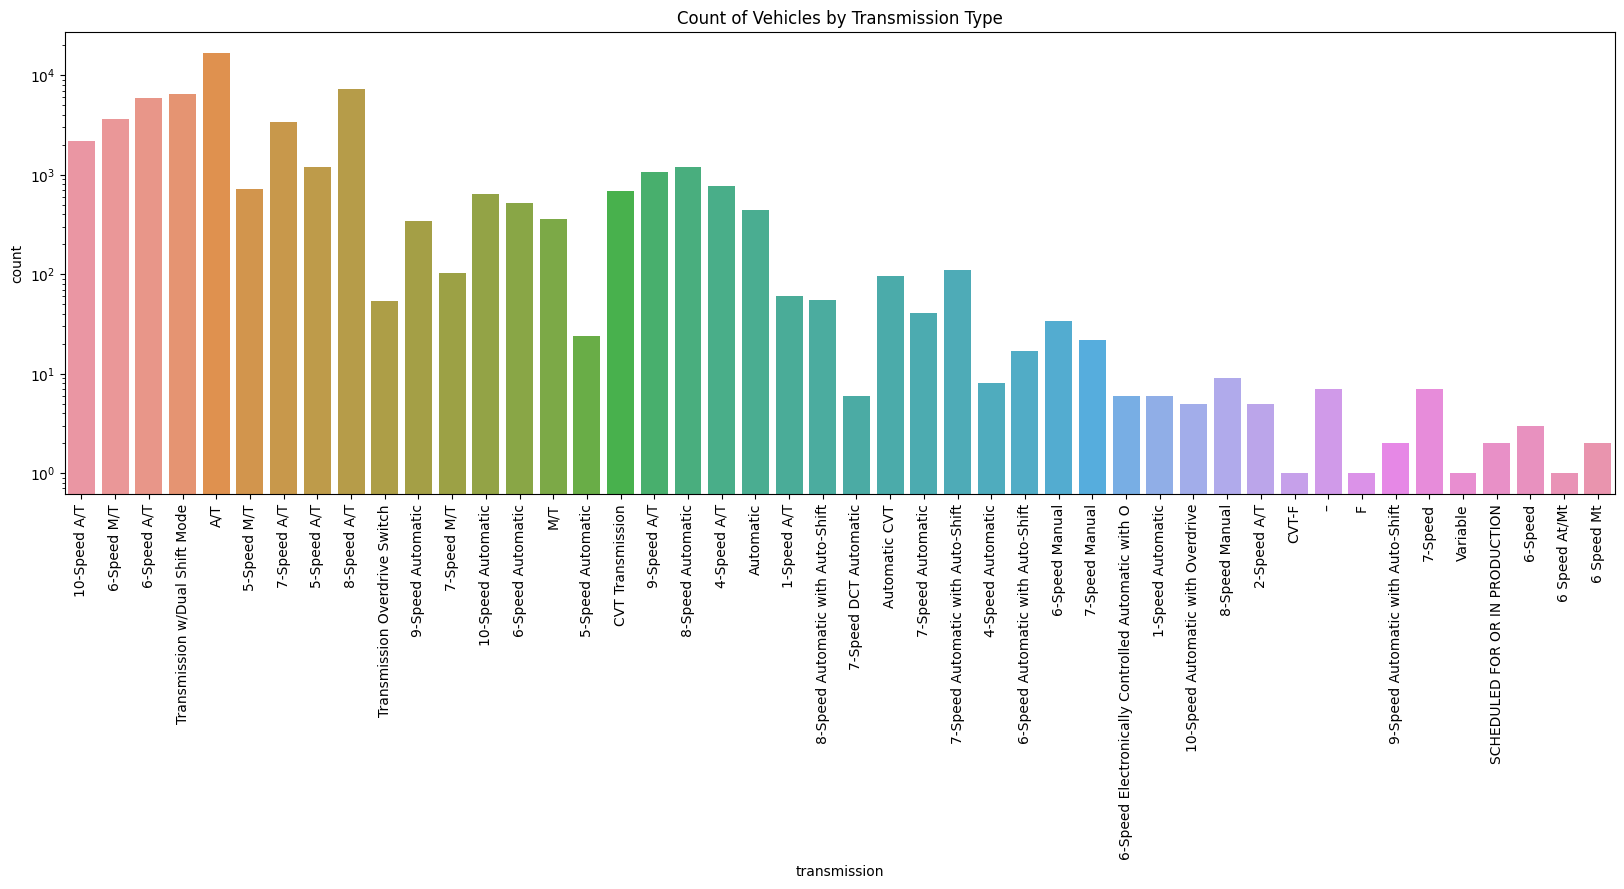

In [11]:
plt.figure(figsize=(20,6))
sns.countplot(x='transmission', data=train_df)
plt.yscale('log')
plt.xticks(rotation=90, fontsize=10)
plt.title("Count of Vehicles by Transmission Type")
plt.show()

# **FEATURE ENGINEERING**

In [12]:
def extract_hp(engine_str):
    match = re.search(r'(\d+\.?\d*)HP', engine_str)
    return float(match.group(1)) if match else np.nan

train_df['hp'] = train_df['engine'].apply(extract_hp)
test_df['hp'] = test_df['engine'].apply(extract_hp)

In [13]:
def extract_engine_size(engine_str):
    match = re.search(r'(\d+\.?\d*)L', engine_str)
    return float(match.group(1)) if match else np.nan

train_df['engine_size'] = train_df['engine'].apply(extract_engine_size)
test_df['engine_size'] = test_df['engine'].apply(extract_engine_size)

In [14]:
def extract_gears(transmission_str):
    match = re.search(r'(\d+)-Speed', transmission_str)
    return int(match.group(1)) if match else np.nan

train_df['gears'] = train_df['transmission'].apply(extract_gears)
test_df['gears'] = test_df['transmission'].apply(extract_gears)



In [15]:
train_df['transmission_type'] = train_df['transmission'].apply(lambda x: 'automatic' if 'A/T' in x else 'manual')
test_df['transmission_type'] = test_df['transmission'].apply(lambda x: 'automatic' if 'A/T' in x else 'manual')

In [16]:
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,hp,engine_size,gears,transmission_type
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,375.0,3.5,10.0,automatic
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,300.0,3.0,6.0,manual
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,300.0,4.2,6.0,automatic
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,335.0,3.0,NaN,manual
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,200.0,3.8,NaN,automatic


# **MODEL BUILDING**

In [17]:
features = ['model_year', 'milage', 'hp', 'engine_size', 'gears', 'transmission_type', 'brand', 'model', 'fuel_type', 'ext_col', 'int_col', 'accident', 'clean_title']
X = train_df[features]
y = train_df['price']
X_test = test_df[features]

In [18]:
numeric_features = ['model_year', 'milage', 'hp', 'engine_size', 'gears']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [19]:
categorical_features = ['transmission_type', 'brand', 'model', 'fuel_type', 'ext_col', 'int_col', 'accident', 'clean_title']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [21]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, min_samples_split=2, min_samples_leaf=1))
])

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['model_year', 'milage', 'hp',
                                                   'engine_size', 'gears']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['transmission_type', 'brand',
                                                   'model', 'fuel_type',
                                                   'ext_col', 'int_col',
                                                   'accident',
                                                   'clean_title'])])),
                ('regressor',
                 GradientBoostingRegressor(max_depth=5, n_estimators=200))])

In [24]:
y_val_pred = pipeline.predict(X_val)

In [25]:
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
print(f"Validation RMSE: {val_rmse}")

Validation RMSE: 49775.302817801195


In [26]:
X_test_preprocessed = pipeline.named_steps['preprocessor'].transform(X_test)

In [27]:
test_predictions = pipeline.named_steps['regressor'].predict(X_test_preprocessed)


In [28]:
submission = pd.DataFrame({'id': test_df['id'], 'price': test_predictions})

In [29]:
submission.to_csv('/kaggle/working/submission.csv', index=False)

In [30]:
submission.head()

,id,price
0,54273,24857.971704
1,54274,16935.716026
2,54275,27289.636409
3,54276,56196.097398
4,54277,36986.785591
